# includes

In [5]:
from fiture_extraction import *
from scipy.signal import find_peaks , savgol_filter


### Read images

In [2]:
images = Images_class()
images.get_images_inf('leaves_final/')

c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Calculate distance each contour from centroid

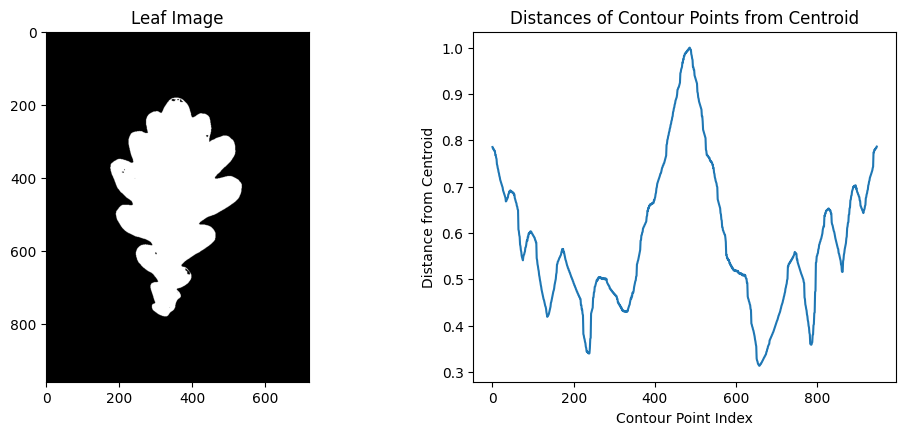

In [3]:
images.Calculate_distance_each_contour_from_centroid()
plot_image_and_distances(images.binary_images[50] , images.list_distances[50])

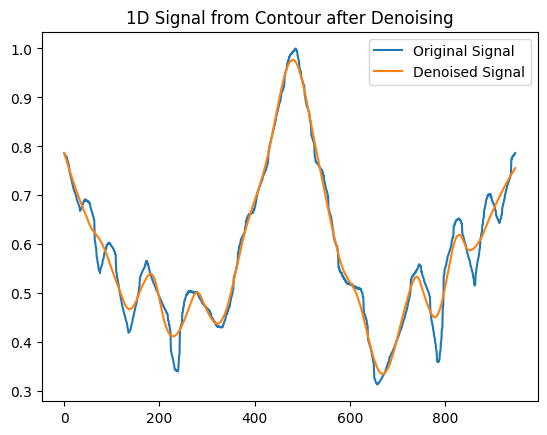

6

In [14]:
from scipy.signal import find_peaks , savgol_filter
def count_petals_of_leaf(distances):

    smoothed_signal = savgol_filter(distances, window_length=100, polyorder=2)
    minima_indices = find_peaks(-smoothed_signal)[0]

    return minima_indices

smoothed_signal = savgol_filter(images.list_distances[50], window_length=100, polyorder=2)
plt.plot(images.list_distances[50], label='Original Signal')
plt.plot(smoothed_signal, label='Denoised Signal')
plt.title('1D Signal from Contour after Denoising')
plt.legend()
plt.show()

len(count_petals_of_leaf(images.list_distances[50]))

### extract some features ('mean_distance' , 'num_petals_of_leaves' , ... )

In [6]:

std_distance_list = []
min_distance_list = []
mean_distance_list = []
num_petals_of_leaves_list = []
legth_to_width_ratio = []
avg_leaf_to_background_list=[]
form_factors_list = []
convexity_list = []
red_mean_color_list = []
green_mean_color_list = []
blue_mean_color_list = []
perimeter_list = []
for i in range(len(images.list_distances)):

    y_start , y_end , x_start , x_end = find_Length_and_width(images.binary_images[i])
    smoothed_signal = savgol_filter(images.list_distances[i], window_length=100, polyorder=2)
    minima_indices = find_peaks(-smoothed_signal)[0]

    num_petals_of_leaves_list.append(len(minima_indices))
    legth_to_width_ratio.append((y_end - y_start) / (x_end - x_start))
    avg_leaf_to_background_list.append(Calculate_avg_leaf_to_background_ratio(images.binary_images[i][y_start:y_end , x_start:x_end]))
    mean_distance_list.append(np.mean(images.list_distances[i]))
    std_distance_list.append(np.std(images.list_distances[i]))
    min_distance_list.append(np.min(images.list_distances[i]))
    

    
    # Calculate shape features
    area = cv2.contourArea(images.contours_images[i])
    perimeter = cv2.arcLength(images.contours_images[i], True)
    convex_hull = cv2.convexHull(images.contours_images[i])
    convexity = perimeter / cv2.arcLength(convex_hull, True)
    form_factor = (4 * np.pi * area) / (perimeter ** 2)

    form_factors_list.append(form_factor)
    convexity_list.append(convexity)
    perimeter_list.append(perimeter)

    
    # Calculate color features
    mean_color = np.mean(np.array(images.rgb_images[i][y_start:y_end , x_start:x_end]), axis=(0, 1))
    red_mean_color_list.append(mean_color[0])
    green_mean_color_list.append(mean_color[1])
    blue_mean_color_list.append(mean_color[2])



new_features = {
    'mean_distance' : mean_distance_list,
    'std_distance' : std_distance_list,
    'min_distance' : min_distance_list,
    'legth_to_width_ratio' : legth_to_width_ratio,
    'avg_leaf_to_background_ratio' : avg_leaf_to_background_list,
    'num_petals_of_leaves' : num_petals_of_leaves_list ,
    'Perimeter': perimeter_list,
    'Convexity': convexity_list,
    'Form_Factor': form_factors_list,
    'red_mean_color' : red_mean_color_list,
    'green_mean_color' : green_mean_color_list,
    'blue_mean_color' : blue_mean_color_list

    }
new_features= pd.DataFrame(new_features)
new_features

,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,Perimeter,Convexity,Form_Factor,red_mean_color,green_mean_color,blue_mean_color
0,0.703678,0.111736,0.542103,1.631579,2.244901,2,1324.923002,1.122935,0.654050,137.874492,143.570911,150.455605
1,0.704189,0.107399,0.543525,1.654028,2.066886,2,954.205187,1.104718,0.679600,135.351634,142.043754,150.549179
2,0.636708,0.138305,0.465885,1.809816,1.882448,3,779.251868,1.086929,0.643277,129.790995,133.262348,142.879297
3,0.646394,0.119500,0.469862,1.634518,1.938800,2,897.920916,1.106151,0.646818,124.600246,132.707050,136.722010
4,0.627335,0.154731,0.407736,2.000000,1.946505,2,693.269115,1.082260,0.612968,123.963884,126.659919,138.301097
...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.666967,0.147156,0.292140,1.010050,0.956037,11,3844.945639,2.064982,0.149846,178.925034,197.409074,182.028401
336,0.685826,0.135519,0.296964,1.013953,1.088619,16,4631.954859,2.293630,0.128529,170.040649,192.174001,175.060318
337,0.430635,0.128816,0.190799,1.580460,0.501203,13,3931.173991,1.962504,0.116930,203.234973,217.892542,210.571717
338,0.591605,0.204739,0.159810,2.048969,0.406573,7,2848.924214,2.045761,0.135524,200.613402,214.759904,207.218142


### Extract Features using a Pre-trained CNN with PyTorch

In [7]:
images.extract_cnn_features()
images.cnn_feature.shape 

(340, 1000)

In [8]:
new_features = pd.concat([new_features , pd.DataFrame(images.cnn_feature)], axis=1)
new_features

,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,Perimeter,Convexity,Form_Factor,red_mean_color,...,990,991,992,993,994,995,996,997,998,999
0,0.703678,0.111736,0.542103,1.631579,2.244901,2,1324.923002,1.122935,0.654050,137.874492,...,1.957430,-1.368883,-0.301499,1.072893,1.546317,1.196306,0.949010,0.566270,2.183582,1.182005
1,0.704189,0.107399,0.543525,1.654028,2.066886,2,954.205187,1.104718,0.679600,135.351634,...,0.461172,-1.831357,-1.204886,-0.226396,-0.904920,-0.447585,-0.260409,-1.200379,0.226618,0.908569
2,0.636708,0.138305,0.465885,1.809816,1.882448,3,779.251868,1.086929,0.643277,129.790995,...,0.997498,-1.577309,-2.719056,-0.068784,-2.369685,-1.351754,-0.802335,-1.087701,-0.392465,0.102415
3,0.646394,0.119500,0.469862,1.634518,1.938800,2,897.920916,1.106151,0.646818,124.600246,...,0.742218,-1.783120,-2.884050,-1.110871,-1.842747,-0.670778,-0.989545,-1.057844,-0.419344,0.556341
4,0.627335,0.154731,0.407736,2.000000,1.946505,2,693.269115,1.082260,0.612968,123.963884,...,0.643030,-1.598947,-2.405208,-0.836707,-2.280971,-0.830821,-1.082651,-1.184264,0.184482,0.991342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.666967,0.147156,0.292140,1.010050,0.956037,11,3844.945639,2.064982,0.149846,178.925034,...,-1.707822,0.964975,-3.341944,-1.109467,-2.197548,0.680147,0.922672,-2.462276,0.274959,2.551766
336,0.685826,0.135519,0.296964,1.013953,1.088619,16,4631.954859,2.293630,0.128529,170.040649,...,-1.693874,2.093219,-3.434451,-0.625785,-1.392595,1.978725,1.931579,-2.735266,1.047569,2.348830
337,0.430635,0.128816,0.190799,1.580460,0.501203,13,3931.173991,1.962504,0.116930,203.234973,...,-1.093918,-0.652697,-3.655030,-1.500917,-1.672543,1.547865,0.351159,-2.692649,0.352426,1.974477
338,0.591605,0.204739,0.159810,2.048969,0.406573,7,2848.924214,2.045761,0.135524,200.613402,...,-0.813006,-1.391961,-2.734076,-0.828948,-2.431532,0.266687,0.771030,-2.098815,0.431145,1.448587


### get pictures hog and apply PCA on it

In [9]:
images.get_pictures_hog()
images.list_images_hog.shape

(340, 21600)

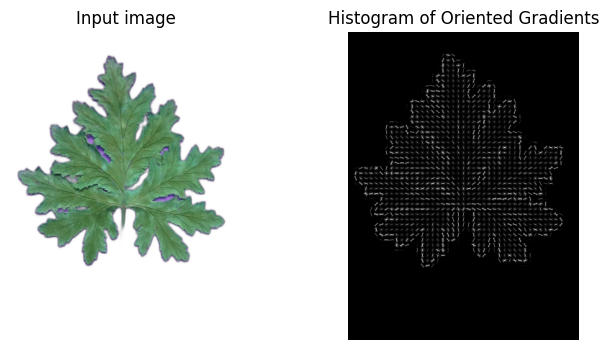

In [10]:
plot_hog_example(images.rgb_images[336])

In [11]:
pca_df = apply_pca(images.list_images_hog , 'pictures_hog' , n_components=200)
pca_df

,PC_pictures_hog_1,PC_pictures_hog_2,PC_pictures_hog_3,PC_pictures_hog_4,PC_pictures_hog_5,PC_pictures_hog_6,PC_pictures_hog_7,PC_pictures_hog_8,PC_pictures_hog_9,PC_pictures_hog_10,...,PC_pictures_hog_191,PC_pictures_hog_192,PC_pictures_hog_193,PC_pictures_hog_194,PC_pictures_hog_195,PC_pictures_hog_196,PC_pictures_hog_197,PC_pictures_hog_198,PC_pictures_hog_199,PC_pictures_hog_200
0,-0.594119,11.957643,1.850141,1.296449,-0.628240,-0.272736,-0.939545,-0.881305,0.825065,3.502698,...,0.027439,-0.418354,-0.013046,-0.257934,-0.716608,0.005073,1.251061,-0.441813,-0.810102,0.510281
1,-5.462840,6.630551,1.398753,2.032520,-2.489864,-2.614527,1.289317,-2.431743,1.032352,1.307431,...,-0.402572,0.225348,0.686369,-0.385446,-0.365339,-0.139954,0.153440,-0.800811,0.047251,-1.059160
2,-8.045611,3.459397,1.844997,1.739815,-1.337629,-2.885732,2.867000,-1.077473,2.234838,1.702858,...,-0.040068,0.359355,0.815837,0.210351,0.136601,-0.537042,0.046979,-0.172341,-0.170876,0.106639
3,-6.813601,4.748391,-0.922944,-1.251534,-1.517426,-4.275118,-0.412444,-1.199313,1.102452,-1.004274,...,-0.169347,-0.258058,0.115271,-0.239161,-1.020194,0.880277,0.384593,-0.074310,0.229691,0.496363
4,-9.762819,2.426339,0.902308,-0.859448,0.557055,-3.604758,-0.683797,0.378261,1.358876,1.373062,...,0.298561,-0.539911,-0.080467,0.094584,-0.028845,0.112932,0.007844,0.142322,0.210174,0.378607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,12.018704,2.145812,6.078847,-2.208265,3.163245,-0.992058,-0.434896,0.961212,2.392362,-2.863476,...,0.033026,-0.041097,-0.104823,-0.077097,-0.197090,-0.103009,0.020924,-0.038575,-0.055039,0.132712
336,14.362893,3.853690,8.982595,-0.632179,4.777527,0.280873,-3.447450,3.208141,3.494227,-0.054845,...,0.104374,0.121744,0.012529,0.121091,-0.062073,0.099868,-0.070007,-0.038900,0.087276,-0.014817
337,7.886197,1.708205,8.237058,2.659977,-1.900034,-0.628896,-3.510577,-0.657401,-3.211343,-1.105304,...,0.055273,-0.043761,-0.164788,-0.185144,0.066681,0.138189,-0.247439,0.107014,-0.053090,-0.172622
338,0.592375,-5.476901,6.287895,-2.251541,0.299909,-4.065912,-0.193817,-0.358721,1.842810,-2.262677,...,-0.568113,-0.046745,-0.071612,0.047801,0.211262,0.055514,-0.281001,0.044041,-0.241035,0.024207


In [12]:
new_features = pd.concat([new_features , pca_df ], axis=1)
new_features

,mean_distance,std_distance,min_distance,legth_to_width_ratio,avg_leaf_to_background_ratio,num_petals_of_leaves,Perimeter,Convexity,Form_Factor,red_mean_color,...,PC_pictures_hog_191,PC_pictures_hog_192,PC_pictures_hog_193,PC_pictures_hog_194,PC_pictures_hog_195,PC_pictures_hog_196,PC_pictures_hog_197,PC_pictures_hog_198,PC_pictures_hog_199,PC_pictures_hog_200
0,0.703678,0.111736,0.542103,1.631579,2.244901,2,1324.923002,1.122935,0.654050,137.874492,...,0.027439,-0.418354,-0.013046,-0.257934,-0.716608,0.005073,1.251061,-0.441813,-0.810102,0.510281
1,0.704189,0.107399,0.543525,1.654028,2.066886,2,954.205187,1.104718,0.679600,135.351634,...,-0.402572,0.225348,0.686369,-0.385446,-0.365339,-0.139954,0.153440,-0.800811,0.047251,-1.059160
2,0.636708,0.138305,0.465885,1.809816,1.882448,3,779.251868,1.086929,0.643277,129.790995,...,-0.040068,0.359355,0.815837,0.210351,0.136601,-0.537042,0.046979,-0.172341,-0.170876,0.106639
3,0.646394,0.119500,0.469862,1.634518,1.938800,2,897.920916,1.106151,0.646818,124.600246,...,-0.169347,-0.258058,0.115271,-0.239161,-1.020194,0.880277,0.384593,-0.074310,0.229691,0.496363
4,0.627335,0.154731,0.407736,2.000000,1.946505,2,693.269115,1.082260,0.612968,123.963884,...,0.298561,-0.539911,-0.080467,0.094584,-0.028845,0.112932,0.007844,0.142322,0.210174,0.378607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.666967,0.147156,0.292140,1.010050,0.956037,11,3844.945639,2.064982,0.149846,178.925034,...,0.033026,-0.041097,-0.104823,-0.077097,-0.197090,-0.103009,0.020924,-0.038575,-0.055039,0.132712
336,0.685826,0.135519,0.296964,1.013953,1.088619,16,4631.954859,2.293630,0.128529,170.040649,...,0.104374,0.121744,0.012529,0.121091,-0.062073,0.099868,-0.070007,-0.038900,0.087276,-0.014817
337,0.430635,0.128816,0.190799,1.580460,0.501203,13,3931.173991,1.962504,0.116930,203.234973,...,0.055273,-0.043761,-0.164788,-0.185144,0.066681,0.138189,-0.247439,0.107014,-0.053090,-0.172622
338,0.591605,0.204739,0.159810,2.048969,0.406573,7,2848.924214,2.045761,0.135524,200.613402,...,-0.568113,-0.046745,-0.071612,0.047801,0.211262,0.055514,-0.281001,0.044041,-0.241035,0.024207


### Save New Fitures to final_features.csv

In [15]:
df = pd.read_csv('leaves.csv', header=None)
df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']
new_features = pd.concat([df ,new_features], axis=1)
new_features

,A,B,C,D,E,F,G,H,I,J,...,PC_pictures_hog_191,PC_pictures_hog_192,PC_pictures_hog_193,PC_pictures_hog_194,PC_pictures_hog_195,PC_pictures_hog_196,PC_pictures_hog_197,PC_pictures_hog_198,PC_pictures_hog_199,PC_pictures_hog_200
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,...,0.027439,-0.418354,-0.013046,-0.257934,-0.716608,0.005073,1.251061,-0.441813,-0.810102,0.510281
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,...,-0.402572,0.225348,0.686369,-0.385446,-0.365339,-0.139954,0.153440,-0.800811,0.047251,-1.059160
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,...,-0.040068,0.359355,0.815837,0.210351,0.136601,-0.537042,0.046979,-0.172341,-0.170876,0.106639
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,...,-0.169347,-0.258058,0.115271,-0.239161,-1.020194,0.880277,0.384593,-0.074310,0.229691,0.496363
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,...,0.298561,-0.539911,-0.080467,0.094584,-0.028845,0.112932,0.007844,0.142322,0.210174,0.378607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,...,0.033026,-0.041097,-0.104823,-0.077097,-0.197090,-0.103009,0.020924,-0.038575,-0.055039,0.132712
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,...,0.104374,0.121744,0.012529,0.121091,-0.062073,0.099868,-0.070007,-0.038900,0.087276,-0.014817
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,...,0.055273,-0.043761,-0.164788,-0.185144,0.066681,0.138189,-0.247439,0.107014,-0.053090,-0.172622
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,...,-0.568113,-0.046745,-0.071612,0.047801,0.211262,0.055514,-0.281001,0.044041,-0.241035,0.024207


In [13]:
new_features.to_csv('final_feature.csv')